## Import FTP and Numpy 

In [1]:
import re
import sys
from ftplib import FTP
import numpy as np

## Fetching station value through FTP

In [67]:
def get_data_station(station_id):
  print("\nGETTING DATA FOR STATION: ",station_id)

  ftp = FTP('ftp.ncdc.noaa.gov')
  ftp.login()
  ftp.cwd('pub/data/ghcn/daily/all')
  ftp.retrbinary('RETR '+station_id+'.dly', open(station_id+'.dly', 'wb').write)
  ftp.quit()

  outfile=station_id+".dly"
  return outfile


In [68]:
get_data_station('IN022021900')

('\nGETTING DATA FOR STATION: ', 'IN022021900')


'IN022021900.dly'

In [69]:
  infile = get_data_station('IN022021900')

  file_handle = open(infile, 'r')
  ghcnd_contents = file_handle.readlines()
  file_handle.close()

('\nGETTING DATA FOR STATION: ', 'IN022021900')


In [70]:
ghcnd_contents

['IN022021900190101PRCP   79  I    0  I    0  I    0  I    0  I    0  I    0  I    5  I   41  I    0  I    0  I    0  I   18  I  130  I   25  I    0  I    0  I    0  I    0  I   20  I   25  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I\n',
 'IN022021900190102PRCP    0  I    0  I    0  I    0  I    5  I    5  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I   51  I   30  I    0  I    0  I   41  I    0  I    0  I    0  I    0  I    0  I    0  I-9999   -9999   -9999   \n',
 'IN022021900190103PRCP    0  I    0  I    0  I    0  I    0  I    0  I   46  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I   97  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I\n',
 'IN022021900190104PRCP    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0

## value of year for the first row 

In [8]:
ghcnd_contents[0]


'IN001090500195101PRCP    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I\n'

## value of mon for first row 

In [227]:
ghcnd_contents[][11:15]

SyntaxError: invalid syntax (<ipython-input-227-b9c713ee26aa>, line 1)

## average of all the values 

In [8]:
temp_othrow = []
temp_othrow = ghcnd_contents[0][21 :]

In [9]:
temp_othrow[0]

'-'

In [10]:
temp_othrow

'-9999     326  G  395  G  334  G  225  G  280  G  325  G  335  G  356  G  361  G  340  G  330  G  232  G  238  G  271  G  285  G  316  G  308  G  375  G  310  G-9999     262  G  294  G  316  G  325  G  340  G  255  G  250  G  295  G-9999   -9999   \n'

## splitting values 

In [11]:
splitted_temp = []
splitted_temp = temp_othrow.split(' ')
splitted_temp

['-9999',
 '',
 '',
 '',
 '',
 '326',
 '',
 'G',
 '',
 '395',
 '',
 'G',
 '',
 '334',
 '',
 'G',
 '',
 '225',
 '',
 'G',
 '',
 '280',
 '',
 'G',
 '',
 '325',
 '',
 'G',
 '',
 '335',
 '',
 'G',
 '',
 '356',
 '',
 'G',
 '',
 '361',
 '',
 'G',
 '',
 '340',
 '',
 'G',
 '',
 '330',
 '',
 'G',
 '',
 '232',
 '',
 'G',
 '',
 '238',
 '',
 'G',
 '',
 '271',
 '',
 'G',
 '',
 '285',
 '',
 'G',
 '',
 '316',
 '',
 'G',
 '',
 '308',
 '',
 'G',
 '',
 '375',
 '',
 'G',
 '',
 '310',
 '',
 'G-9999',
 '',
 '',
 '',
 '',
 '262',
 '',
 'G',
 '',
 '294',
 '',
 'G',
 '',
 '316',
 '',
 'G',
 '',
 '325',
 '',
 'G',
 '',
 '340',
 '',
 'G',
 '',
 '255',
 '',
 'G',
 '',
 '250',
 '',
 'G',
 '',
 '295',
 '',
 'G-9999',
 '',
 '',
 '-9999',
 '',
 '',
 '\n']

## eliminating character and blanks (flags)

In [12]:

split_temp = []
for row in splitted_temp :
    if row == ('') :
        continue 
    else :
        split_temp.append(row)
        

In [13]:
split_temp

['-9999',
 '326',
 'G',
 '395',
 'G',
 '334',
 'G',
 '225',
 'G',
 '280',
 'G',
 '325',
 'G',
 '335',
 'G',
 '356',
 'G',
 '361',
 'G',
 '340',
 'G',
 '330',
 'G',
 '232',
 'G',
 '238',
 'G',
 '271',
 'G',
 '285',
 'G',
 '316',
 'G',
 '308',
 'G',
 '375',
 'G',
 '310',
 'G-9999',
 '262',
 'G',
 '294',
 'G',
 '316',
 'G',
 '325',
 'G',
 '340',
 'G',
 '255',
 'G',
 '250',
 'G',
 '295',
 'G-9999',
 '-9999',
 '\n']

## remove character flags

In [14]:
split_temp_final = []
for row in split_temp :
    if row.isalpha() == True   :
        continue 
    if row == 'G-9999' :
        continue
    else :
        split_temp_final.append(row)
        

In [15]:
split_temp_final
#len(split_temp_final)
del split_temp_final[-1] 
split_temp_final

['-9999',
 '326',
 '395',
 '334',
 '225',
 '280',
 '325',
 '335',
 '356',
 '361',
 '340',
 '330',
 '232',
 '238',
 '271',
 '285',
 '316',
 '308',
 '375',
 '310',
 '262',
 '294',
 '316',
 '325',
 '340',
 '255',
 '250',
 '295',
 '-9999']

In [16]:
len(split_temp_final)

29

## averaging temp values for all days 

In [17]:
avg_days = []
first_mon = []
for row in split_temp_final :
    if row != '-9999' :
        
        avg_days.append(int(row))


In [18]:
first_mon = sum(avg_days) /len(avg_days) 
first_mon

306

## doing this for all years 

In [71]:
def Year(ghcnd_contents):
    Year = []
    for i in range(0,len(ghcnd_contents)):
         if(ghcnd_contents[i][17:21] == 'TMAX') :
            Year.append(ghcnd_contents[i][11:15])
    return Year 
   
    

In [72]:
Years = Year(ghcnd_contents)
Years

['1944',
 '1944',
 '1944',
 '1944',
 '1944',
 '1944',
 '1944',
 '1944',
 '1944',
 '1944',
 '1944',
 '1944',
 '1945',
 '1945',
 '1945',
 '1945',
 '1945',
 '1945',
 '1945',
 '1945',
 '1945',
 '1945',
 '1945',
 '1945',
 '1946',
 '1946',
 '1957',
 '1957',
 '1957',
 '1957',
 '1957',
 '1957',
 '1957',
 '1957',
 '1957',
 '1957',
 '1957',
 '1957',
 '1958',
 '1958',
 '1958',
 '1958',
 '1958',
 '1958',
 '1958',
 '1958',
 '1958',
 '1958',
 '1958',
 '1958',
 '1959',
 '1959',
 '1959',
 '1959',
 '1959',
 '1959',
 '1959',
 '1959',
 '1959',
 '1959',
 '1959',
 '1959',
 '1960',
 '1960',
 '1960',
 '1960',
 '1960',
 '1961',
 '1961',
 '1961',
 '1962',
 '1962',
 '1962',
 '1962',
 '1962',
 '1962',
 '1973',
 '1973',
 '1973',
 '1973',
 '1973',
 '1973',
 '1973',
 '1973',
 '1973',
 '1973',
 '1973',
 '1973',
 '1974',
 '1974',
 '1974',
 '1974',
 '1974',
 '1974',
 '1974',
 '1974',
 '1974',
 '1974',
 '1974',
 '1974',
 '1975',
 '1975',
 '1975',
 '1975',
 '1975',
 '1975',
 '1975',
 '1975',
 '1975',
 '1975',
 '1975',
 

## taking values of temp corresponding to month

In [73]:
def all_days_tmax(ghcnd_contents):
    temp_row_values = []
    for row in  ghcnd_contents :
        if(row[17:21] == 'TMAX'):
            temp_row_values.append(row[21:])
    return temp_row_values

In [74]:
Tmax_all_year =[]
Tmax_all_year = all_days_tmax(ghcnd_contents)
Tmax_all_year

['  222  S-9999     239  S  222  S-9999     228  S  222  S  167  S  206  S-9999     211  S-9999   -9999   -9999     200  S-9999   -9999   -9999     244  S  244  S  250  S  189  S  200  S-9999   -9999     172  S  183  S  200  S  194  S-9999     200  S\n',
 '-9999   -9999   -9999     228  S  228  S  211  S  228  S  228  S  228  S-9999   -9999     239  S-9999     261  S-9999     256  S  267  S  261  S  211  S  228  S  222  S  239  S-9999   -9999     239  S-9999     272  S-9999     244  S-9999   -9999   \n',
 '-9999     267  S  272  S  278  S  306  S  294  S  272  S-9999   -9999     317  S  322  S  306  S-9999     322  S-9999   -9999     306  S  317  S-9999     306  S  256  S  267  S  250  S-9999     300  S  294  S  244  S-9999   -9999     267  S-9999   \n',
 '  306  S-9999     244  S-9999     278  S  272  S  300  S  311  S-9999     356  S-9999     361  S  333  S  356  S  356  S  367  S  378  S  372  S  378  S-9999   -9999     411  S  422  S  422  S  394  S  406  S  383  S  394  S  400  S-

## split values of  rows from strings to list 

In [75]:
def split_function(Tmax_all_year) :
    split_temp = []
    for row in Tmax_all_year :
        
        tempo = []
        tempo = row.split(' ')
        split_temp.append(tempo)
    return split_temp
        

        

In [76]:
splitted_temp_all_years = []
splitted_temp_all_years = split_function(Tmax_all_year)

In [11]:
type(splitted_temp_all_years)
splitted_temp_all_years[117]

['',
 '',
 '271',
 '',
 'S',
 '',
 '278',
 '',
 'S-9999',
 '',
 '',
 '',
 '',
 '324',
 '',
 'S',
 '',
 '331',
 '',
 'S-9999',
 '',
 '',
 '-9999',
 '',
 '',
 '',
 '',
 '285',
 '',
 'S-9999',
 '',
 '',
 '',
 '',
 '306',
 '',
 'S',
 '',
 '327',
 '',
 'S',
 '',
 '327',
 '',
 'S',
 '',
 '330',
 '',
 'S',
 '',
 '326',
 '',
 'S-9999',
 '',
 '',
 '-9999',
 '',
 '',
 '',
 '',
 '297',
 '',
 'S',
 '',
 '306',
 '',
 'S',
 '',
 '331',
 '',
 'S',
 '',
 '334',
 '',
 'S',
 '',
 '360',
 '',
 'S',
 '',
 '326',
 '',
 'S',
 '',
 '327',
 '',
 'S',
 '',
 '340',
 '',
 'S',
 '',
 '336',
 '',
 'S',
 '',
 '336',
 '',
 'S',
 '',
 '335',
 '',
 'S',
 '',
 '336',
 '',
 'S',
 '',
 '332',
 '',
 'S',
 '',
 '312',
 '',
 'S',
 '',
 '306',
 '',
 'S\n']

In [77]:
len(splitted_temp_all_years[1])


112

In [78]:
split_temp_1 = []
array = []
for i in range(0,len(splitted_temp_all_years)):
    split_temp_1 = []
    for row in splitted_temp_all_years[i] :
        if row == ('') :
            continue 
        elif row.isalpha() == True :
            continue 
        elif row == 'G-9999' : 
            continue
        elif row == 'S-9999' :
            continue 
        elif row == 'OS-9999':
            continue
        else :
            split_temp_1.append(row)
    del split_temp_1[-1]
    array.append(split_temp_1)
        

In [14]:
#len(array[97])
#for i in range(0,31) :
    #array[97][i]= array[97][i].replace("H", "")
    #array[105][i]= array[105][i].replace("H", "")
    #array[113][i]= array[113][i].replace("H", "")
    
    
    

In [15]:
#for i in range(0,30) :
    
    #array[101][i]= array[101][i].replace("H", "")
    #array[109][i]= array[109][i].replace("H", "")
    #array[117][i]= array[117][i].replace("H", "")

In [16]:
#len(array[117])

In [79]:
array

[['222',
  '239',
  '222',
  '228',
  '222',
  '167',
  '206',
  '211',
  '-9999',
  '-9999',
  '200',
  '-9999',
  '-9999',
  '244',
  '244',
  '250',
  '189',
  '200',
  '-9999',
  '172',
  '183',
  '200',
  '194',
  '200'],
 ['-9999',
  '-9999',
  '-9999',
  '228',
  '228',
  '211',
  '228',
  '228',
  '228',
  '-9999',
  '239',
  '261',
  '256',
  '267',
  '261',
  '211',
  '228',
  '222',
  '239',
  '-9999',
  '239',
  '272',
  '244',
  '-9999'],
 ['-9999',
  '267',
  '272',
  '278',
  '306',
  '294',
  '272',
  '-9999',
  '317',
  '322',
  '306',
  '322',
  '-9999',
  '306',
  '317',
  '306',
  '256',
  '267',
  '250',
  '300',
  '294',
  '244',
  '-9999',
  '267'],
 ['306',
  '244',
  '278',
  '272',
  '300',
  '311',
  '356',
  '361',
  '333',
  '356',
  '356',
  '367',
  '378',
  '372',
  '378',
  '-9999',
  '411',
  '422',
  '422',
  '394',
  '406',
  '383',
  '394',
  '400',
  '-9999'],
 ['417',
  '400',
  '411',
  '422',
  '428',
  '417',
  '411',
  '428',
  '-9999',
  '417

## average 

In [117]:
avg_days = []
first_mon = []
Country = []
for i in range(0,len(array)):
    avg_days = []
    Country.append(ghcnd_contents[0][0:2]) 
    for row in array[i] :
        
        if row != '-9999' :
            avg_days.append(row)
            avg_days = map(int, avg_days)
    avg = float(sum(avg_days)/len(avg_days))
    print avg_days,len(avg_days),avg
        
    
    first_mon.append(avg)


[222, 239, 222, 228, 222, 167, 206, 211, 200, 244, 244, 250, 189, 200, 172, 183, 200, 194, 200] 19 210.0
[228, 228, 211, 228, 228, 228, 239, 261, 256, 267, 261, 211, 228, 222, 239, 239, 272, 244] 18 238.0
[267, 272, 278, 306, 294, 272, 317, 322, 306, 322, 306, 317, 306, 256, 267, 250, 300, 294, 244, 267] 20 288.0
[306, 244, 278, 272, 300, 311, 356, 361, 333, 356, 356, 367, 378, 372, 378, 411, 422, 422, 394, 406, 383, 394, 400] 23 356.0
[417, 400, 411, 422, 428, 417, 411, 428, 417, 406, 406, 394, 406, 411, 400, 394, 406, 422, 444, 444, 444, 456, 461, 461, 472, 467, 417] 27 424.0
[389, 406, 356, 389, 400, 406, 422, 406, 417, 383, 417, 433, 411, 350, 394, 383, 378, 400, 411, 439, 428, 367, 372, 383, 372, 389, 389] 27 395.0
[417, 378, 333, 317, 328, 317, 306, 306, 333, 361, 344, 322, 328, 339] 14 337.0
[356, 350, 344, 356, 367, 361, 339, 317, 294, 361, 361, 372, 339, 344, 350, 306] 16 344.0
[294, 322, 328, 322, 328, 339, 350, 356, 350, 361, 367, 361, 361, 339, 350, 356, 361, 361, 361, 356,

In [118]:
first_mon

[210.0,
 238.0,
 288.0,
 356.0,
 424.0,
 395.0,
 337.0,
 344.0,
 348.0,
 329.0,
 293.0,
 245.0,
 200.0,
 258.0,
 326.0,
 356.0,
 412.0,
 420.0,
 353.0,
 349.0,
 327.0,
 323.0,
 290.0,
 225.0,
 239.0,
 265.0,
 200.0,
 239.0,
 282.0,
 347.0,
 383.0,
 389.0,
 355.0,
 339.0,
 326.0,
 328.0,
 279.0,
 218.0,
 236.0,
 251.0,
 320.0,
 376.0,
 403.0,
 407.0,
 345.0,
 334.0,
 328.0,
 318.0,
 264.0,
 250.0,
 202.0,
 223.0,
 314.0,
 365.0,
 394.0,
 405.0,
 350.0,
 372.0,
 340.0,
 339.0,
 270.0,
 241.0,
 220.0,
 271.0,
 274.0,
 340.0,
 399.0,
 300.0,
 311.0,
 300.0,
 211.0,
 272.0,
 311.0,
 383.0,
 339.0,
 311.0,
 210.0,
 254.0,
 301.0,
 390.0,
 404.0,
 392.0,
 361.0,
 327.0,
 345.0,
 326.0,
 287.0,
 205.0,
 216.0,
 231.0,
 317.0,
 381.0,
 394.0,
 392.0,
 338.0,
 344.0,
 361.0,
 334.0,
 286.0,
 214.0,
 191.0,
 231.0,
 296.0,
 370.0,
 404.0,
 366.0,
 340.0,
 328.0,
 312.0,
 316.0,
 275.0,
 239.0,
 222.0,
 232.0,
 281.0,
 358.0,
 387.0,
 368.0,
 342.0,
 315.0,
 335.0,
 336.0,
 281.0,
 226.0,
 203.0,


In [89]:
len(array)
c = "Country"
country = [c]+ Country
country


['Country',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 'IN',
 

## average value of days for month , year first mon and Year 

## remove blank fags 

In [153]:
def remove_blank_flags(splitted_temp_all_years):
    split_temp = []
    array = []
    j = 0
    for i in range(0,len(splitted_temp_all_years)) :
        for row in splitted_temp_all_years[i]:
            
            if row == '' :
                continue 
            elif row.isalpha() == True :
                continue 
            elif row == 'G-9999' : 
                continue
            else :
                split_temp.append(row)
                
                #del split_temp[-1]
        array.append(split_temp)
    return array
        

In [154]:
splitted_temp_all_years_wof = []
splitted_temp_all_years_wof =  remove_blank_flags(splitted_temp_all_years)

In [155]:
splitted_temp_all_years_wof[0]

['-9999',
 '326',
 '395',
 '334',
 '225',
 '280',
 '325',
 '335',
 '356',
 '361',
 '340',
 '330',
 '232',
 '238',
 '271',
 '285',
 '316',
 '308',
 '375',
 '310',
 '262',
 '294',
 '316',
 '325',
 '340',
 '255',
 '250',
 '295',
 '-9999',
 '\n',
 '-9999',
 '96',
 '184',
 '182',
 '110',
 '66',
 '159',
 '175',
 '190',
 '182',
 '190',
 '182',
 '154',
 '85',
 '52',
 '77',
 '174',
 '116',
 '168',
 '184',
 '62',
 '144',
 '190',
 '142',
 '163',
 '184',
 '130',
 '104',
 '-9999',
 '\n',
 '305',
 '293',
 '310',
 '330',
 '346',
 '274',
 '300',
 '326',
 '300',
 '226',
 '265',
 '206',
 '216',
 '243',
 '247',
 '218',
 '228',
 '285',
 '293',
 '280',
 '265',
 '201',
 '169',
 '200',
 '226',
 '206',
 '242',
 '237',
 '251',
 '195',
 '175',
 'G\n',
 '142',
 '99',
 '171',
 '183',
 '177',
 '174',
 '146',
 '152',
 '187',
 '177',
 '182',
 '179',
 '132',
 '143',
 '153',
 '85',
 '105',
 '113',
 '179',
 '179',
 '184',
 '124',
 '69',
 '34',
 '139',
 '111',
 '63',
 '86',
 '113',
 '137',
 '107',
 'G\n',
 '175',
 '224'

## remove characer flag for all years 

In [29]:

def remove_char_flag(splitted_temp_all_years_wof):
    split_temp = []
    for i in xrange(0,len(splitted_temp_all_years_wof)):
        l = []
        l = splitted_temp_all_years_wof[i]
        print l    
        

            

In [30]:
#for i in xrange(0,len(splitted_temp_all_years_wof)):
    #print i 
remove_char_flag(splitted_temp_all_years_wof)  
for row in l:
            if row.isalpha() == True :
                continue
            if re.search('[a-zA-Z]-9999', row) == True :
                continue 
            else :
                split_temp.append(row)
    return split_temp
               

-9999
326
G
395
G
334
G
225
G
280
G
325
G
335
G
356
G
361
G
340
G
330
G
232
G
238
G
271
G
285
G
316
G
308
G
375
G
310
G-9999
262
G
294
G
316
G
325
G
340
G
255
G
250
G
295
G-9999
-9999


-9999
96
G
184
G
182
G
110
G
66
G
159
G
175
G
190
G
182
G
190
G
182
G
154
G
85
G
52
G
77
G
174
G
116
G
168
G
184
G-9999
62
G
144
G
190
G
142
G
163
G
184
G
130
G
104
G-9999
-9999


305
G
293
G
310
G
330
G
346
G
274
G
300
G
326
G
300
G
226
G
265
G
206
G
216
G
243
G
247
G
218
G
228
G
285
G
293
G
280
G
265
G
201
G
169
G
200
G
226
G
206
G
242
G
237
G
251
G
195
G
175
G

142
G
99
G
171
G
183
G
177
G
174
G
146
G
152
G
187
G
177
G
182
G
179
G
132
G
143
G
153
G
85
G
105
G
113
G
179
G
179
G
184
G
124
G
69
G
34
G
139
G
111
G
63
G
86
G
113
G
137
G
107
G

175
G
224
G
195
G
211
G
203
G
165
G
157
G
182
G
176
G
139
G
168
G
206
G
226
G
226
G
221
G
216
G
232
G
200
G
225
G
163
G
160
G
152
G
152
G
136
G
167
G
180
G
160
G
208
G
176
G
171
G-9999


63
G
60
G
111
G
81
G
68
G
59
G
16
G
69
G
30
G
56
G
-6
G
60
G
46
G
56
G
52
G
83


In [ ]:
splitted_temp_all_years = remove_char_flag(splitted_temp_all_years_wof)

In [40]:
splitted_temp_all_years[0]

'-9999'

In [106]:
def Tmax(ghcnd_contents):
    Tmax = []
    for i in range(0,len(ghcnd_contents)) :
         if(ghcnd_contents[i][17:21] == 'TMAX') :
            Tmax.append(ghcnd_contents[i][21 : ])
    return Tmax 
   

In [107]:
Tmax = Tmax(ghcnd_contents)

In [108]:
import re 

In [109]:
Tmax_final = []
for i in range(0,len(Tmax)):
    
    parsed = re.compile('[^\d-]')
    parsed = parsed.sub(' ', Tmax[i])
    parsed = ' '.join(parsed.split())
    
    Tmax_final.append(parsed.split(' '))
    

In [110]:
Tmax_final[0]
l = len(Tmax_final[0])

In [90]:
def Mon(ghcnd_contents):
    mon = []
    for i in range(len(ghcnd_contents)) :
         if(ghcnd_contents[i][17:21] == 'TMAX') :
            mon.append(ghcnd_contents[i][15:17])
    return mon 
   

In [91]:
Month = []
Month = Mon(ghcnd_contents)

In [92]:
#monyear = map(lambda (year,month): year +' '+ month , zip(Years, Month))
monyear = [year +' '+ month for year,month in zip(Years, Month)]

In [114]:
days = []
type(Year)

function

In [115]:
for row in (Tmax_final):
    t = len(row)
    


In [116]:
days2 = []
for i in range(1,32) :
    days2.append(i)

In [117]:
#days_per_month
#type(days_per_month)
#len(datetime_f)
#dates_array = np.array( datetime_f )
#len(dates_array)
#type(datetime_f)

In [93]:
import datetime
import calendar
from datetime import datetime
datetime_f = []
days_per_month = []
for i in monyear:
        temp = datetime.strptime(i, '%Y %m').date()
        temp_days = calendar.monthrange(temp.year, temp.month)[1]
        days_per_month.append(temp_days)
        date_array = []
        for k in range(0,int(temp_days)):   
            temp_full = i + " "+ str((k+1))
            date_array.append(temp_full)
            
        for j in monyear :
             datetime_f.append(datetime.strptime(j, '%Y %m').date()) 

In [30]:
datetime_f

[datetime.date(1974, 4, 1),
 datetime.date(1974, 5, 1),
 datetime.date(1974, 6, 1),
 datetime.date(1974, 8, 1),
 datetime.date(1974, 9, 1),
 datetime.date(1974, 12, 1),
 datetime.date(1975, 2, 1),
 datetime.date(1975, 3, 1),
 datetime.date(1975, 7, 1),
 datetime.date(1975, 8, 1),
 datetime.date(1975, 9, 1),
 datetime.date(1975, 10, 1),
 datetime.date(1975, 11, 1),
 datetime.date(1975, 12, 1),
 datetime.date(1976, 1, 1),
 datetime.date(1976, 2, 1),
 datetime.date(1976, 3, 1),
 datetime.date(1976, 4, 1),
 datetime.date(1976, 5, 1),
 datetime.date(1976, 6, 1),
 datetime.date(1976, 7, 1),
 datetime.date(1976, 8, 1),
 datetime.date(1976, 9, 1),
 datetime.date(1976, 10, 1),
 datetime.date(1976, 11, 1),
 datetime.date(1976, 12, 1),
 datetime.date(1977, 1, 1),
 datetime.date(1977, 2, 1),
 datetime.date(1977, 3, 1),
 datetime.date(1977, 4, 1),
 datetime.date(1977, 5, 1),
 datetime.date(1977, 6, 1),
 datetime.date(1977, 7, 1),
 datetime.date(1977, 8, 1),
 datetime.date(1977, 9, 1),
 datetime.dat

In [137]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
Tmax_normal = []

for z in range(0,len(Tmax_final)):
    no_days = days_per_month[z]
    measurements = len(Tmax_final[z])
    diff = abs(measurements-no_days)              
    Tmax_normal.append(Tmax_final[z][:-diff or None])


Tmax_normal = np.concatenate( Tmax_normal, axis=0 )
len(Tmax_normal)

#plt.plot_date(datetime_f,Tmax_normal)
#plt.xlabel("Year")
#plt.ylabel("Max Temperature (Celsius degrees to tenths)")#$plt.show()
#plt.savefig('fig1.png', bbox_inches='tight')


NameError: name 'Tmax_final' is not defined

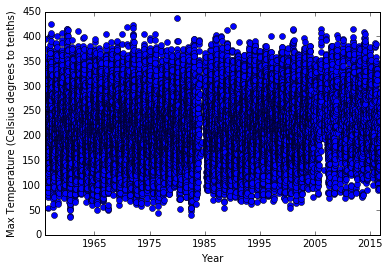

In [166]:
Tmax_no999 = []
for k in range(0,len(Tmax_normal)):
    if Tmax_normal[k] == '-9999' :
         Tmax_no999.append(float('nan'))
    else:
        Tmax_no999.append(Tmax_normal[k])


plt.plot_date(datetime_f,Tmax_no999)
plt.xlabel("Year")
plt.ylabel("Max Temperature (Celsius degrees to tenths)")
plt.show()       

In [121]:
import scipy.stats as stats
#Tmax_no999 = np.asarray(Tmax_no999)

Tmax_no999 = [x for x in Tmax_no999 if str(x) != 'nan']
Tmax_no999

#date_strings = [datetime.strftime("%Y") for datetime in datetime_f]
#date_strings = [1957, 1967, 1977, 1987, 1997, 2007, 2016]

Tmax_no999 = list(map(int, Tmax_no999))

#Tmax_no999 = np.asarray(Tmax_no999)

#ax = plt.subplot(111)

#ax.set_xticklabels(date_strings,rotation=45, rotation_mode="anchor", ha="right")

#plt.hist(Tmax_no999, bins=len(datetime_f), normed =True)

#plt.xlabel("Date")
#plt.ylabel("Max Temperature (Celsius degrees to tenths)")
#plt.tight_layout()
#plt.show()
#plt.pause(0.001)




In [122]:

type(days_per_month)
type(Tmax_no999)

list

In [303]:
datetime_f

[datetime.date(1956, 2, 1),
 datetime.date(1956, 2, 2),
 datetime.date(1956, 2, 3),
 datetime.date(1956, 2, 4),
 datetime.date(1956, 2, 5),
 datetime.date(1956, 2, 6),
 datetime.date(1956, 2, 7),
 datetime.date(1956, 2, 8),
 datetime.date(1956, 2, 9),
 datetime.date(1956, 2, 10),
 datetime.date(1956, 2, 11),
 datetime.date(1956, 2, 12),
 datetime.date(1956, 2, 13),
 datetime.date(1956, 2, 14),
 datetime.date(1956, 2, 15),
 datetime.date(1956, 2, 16),
 datetime.date(1956, 2, 17),
 datetime.date(1956, 2, 18),
 datetime.date(1956, 2, 19),
 datetime.date(1956, 2, 20),
 datetime.date(1956, 2, 21),
 datetime.date(1956, 2, 22),
 datetime.date(1956, 2, 23),
 datetime.date(1956, 2, 24),
 datetime.date(1956, 2, 25),
 datetime.date(1956, 2, 26),
 datetime.date(1956, 2, 27),
 datetime.date(1956, 2, 28),
 datetime.date(1956, 2, 29),
 datetime.date(1956, 3, 1),
 datetime.date(1956, 3, 2),
 datetime.date(1956, 3, 3),
 datetime.date(1956, 3, 4),
 datetime.date(1956, 3, 5),
 datetime.date(1956, 3, 6),


In [124]:
Tmax_Final_2 = [a] + Tmax_no999
Tmax_Final_2
Tmax_normal

array(['-9999', '326', '395', ..., '-9999', '-9999', '-9999'], 
      dtype='|S5')

In [119]:
b = "Year"
Year = [b] + datetime_f
a = "Tmax"
Tmax = [a]+ first_mon


## MonYear , First mon(avg days) = Year, Tmax

In [120]:
import csv
from itertools import izip

with open('Dataset2_csv.csv', 'wb') as f:
    writer = csv.writer(f)
    writer.writerows(izip(country ,Year, Tmax))

In [157]:
import graphlab

In [158]:
csv_data2 = graphlab.SFrame('Dataset2_csv.csv')

This non-commercial license of GraphLab Create for academic use is assigned to ga89qin@mytum.de and will expire on September 27, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1479381404.log


Finished parsing file /Users/abhilashasingh/Documents/Data_Mining/data_mining_prac/Dataset2_csv.csv

Parsing completed. Parsed 100 lines in 0.039118 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/abhilashasingh/Documents/Data_Mining/data_mining_prac/Dataset2_csv.csv

Parsing completed. Parsed 603 lines in 0.016038 secs.

In [159]:
csv_data2


Country,Year,Tmax
IN,1944-01-01,210.0
IN,1944-02-01,238.0
IN,1944-03-01,288.0
IN,1944-04-01,356.0
IN,1944-05-01,424.0
IN,1944-06-01,395.0
IN,1944-07-01,337.0
IN,1944-08-01,344.0
IN,1944-09-01,348.0
IN,1944-10-01,329.0


In [156]:
#graphlab.canvas.set_target('ipynb')

In [132]:
#csv_data['Tmax'].show(view = 'Categorical')

NameError: name 'csv_data' is not defined

In [133]:
csv_data1 = graphlab.SFrame('Dataset1_csv.csv')

Finished parsing file /Users/abhilashasingh/Documents/Data_Mining/data_mining_prac/Dataset1_csv.csv

Parsing completed. Parsed 57 lines in 0.01004 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/abhilashasingh/Documents/Data_Mining/data_mining_prac/Dataset1_csv.csv

Parsing completed. Parsed 57 lines in 0.010457 secs.

In [134]:
csv_data1


Year,Electricity productionfrom coal sources (% of ...
1960-01-01,nan
1961-01-01,nan
1962-01-01,nan
1963-01-01,nan
1964-01-01,nan
1965-01-01,nan
1966-01-01,nan
1967-01-01,nan
1968-01-01,nan
1969-01-01,nan


In [135]:
csv_data2


Year,Tmax
1956-02-01,326
1956-02-02,395
1956-02-03,334
1956-02-04,225
1956-02-05,280
1956-02-06,325
1956-02-07,335
1956-02-08,356
1956-02-09,361
1956-02-10,340


In [138]:
csv_data1.join(csv_data2, how='inner')

Year,Electricity productionfrom coal sources (% of ...,Tmax
1960-01-01,nan,354
1961-01-01,nan,312
1962-01-01,nan,283
1963-01-01,nan,267
1964-01-01,nan,335
1965-01-01,nan,303
1966-01-01,nan,245
1967-01-01,nan,346
1968-01-01,nan,283
1969-01-01,nan,300


## Visualization for dataset 1 

In [152]:
csv_data1['Electricity production from coal sources (% of total)'].max()

3.16555280335249

*max percentage of electricity production from coal sources is 3.17

In [153]:
#graphlab.canvas.set_target('ipynb')

In [154]:
csv_data1.show(view = 'BoxWhisker Plot' , x ='Year' , y = 'Electricity production from coal sources (% of total)')

In [143]:
csv_data1.show(view = 'Bar Chart' , x ='Year' , y = 'Electricity production from coal sources (% of total)')

* From graph , max value is 3.17 in year 1994 and minimum in  2002 -- 0.96

In [144]:
csv_data1['Electricity production from coal sources (% of total)'].show()

In [235]:
csv_data2['Tmax'].max()


438

In [197]:
sf

Year,Tmax
1958-10-27,298
1956-02-01,326
1956-02-02,395
1956-02-03,334
1956-02-04,225
1956-02-05,280
1956-02-06,325
1956-02-07,335
1956-02-08,356
1956-02-09,361


In [334]:
csv_data2.show(view = 'BoxWhisker Plot' , x ='Year' , y = 'Tmax')

Canvas is accessible via web browser at the URL: http://localhost:53517/index.html
Opening Canvas in default web browser.


In [36]:
csv_data2.show(view = 'Bar Chart' , x ='Year' , y = 'Tmax')

Canvas is accessible via web browser at the URL: http://localhost:55033/index.html
Opening Canvas in default web browser.


In [160]:
csv_data2.show()

Canvas is accessible via web browser at the URL: http://localhost:57798/index.html
Opening Canvas in default web browser.


In [162]:
print csv_data2[0]

{'Tmax': 326, 'Year': '1956-02-01'}


In [163]:
import matplotlib.pyplot as plt


In [206]:
for i in range(12000,13000,1) :
    sf1.append(csv_data2[i:i+1])


In [207]:
sf1

Year,Tmax
1958-10-28,287


In [204]:
sf.show(view = 'Bar Chart' , x ='Year' , y = 'Tmax')

In [192]:
sf1 = csv_data2[1000]
type(sf1)


dict

In [208]:
sf1 = csv_data2[1000:]

sf1

Year,Tmax
1958-10-28,287
1958-10-29,262
1958-10-30,314
1958-10-31,260
1958-11-01,295
1958-11-02,240
1958-11-03,313
1958-11-04,218
1958-11-05,340
1958-11-06,368


In [232]:
sf2 = csv_data2[13000:]
for i in range(13000,14000,1):
    sf2.append(csv_data2[i:i+1])

In [233]:
sf2

Year,Tmax
1992-04-05,173
1992-04-06,193
1992-04-07,285
1992-04-08,194
1992-04-09,190
1992-04-10,117
1992-04-11,184
1992-04-12,250
1992-04-13,280
1992-04-14,295


In [234]:
sf2.show(view = 'Bar Chart' , x ='Year' , y = 'Tmax')

** max temp in 1994 is 371


* Two variables that is Country and Year are nominal variables(categorical), while all rest of the features are quantitaive variables(ratio/interval)

In [1]:
import plotly.plotly as py

ImportError: No module named plotly.plotly

In [2]:
pip install plotly --upgrade

SyntaxError: invalid syntax (<ipython-input-2-74247ff778f2>, line 1)

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [162]:
global_temp = pd.read_csv('Dataset2_csv.csv')


In [123]:
global_temp = global_temp[['Year', 'Tmax']]

global_temp['Year'] = pd.to_datetime(global_temp['Year'])
global_temp['year'] = global_temp['Year'].map(lambda x: x.year)
global_temp['month'] = global_temp['Year'].map(lambda x: x.month)



In [124]:
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'

In [125]:
min_year = global_temp['year'].min()
max_year = global_temp['year'].max()
years = range(min_year, max_year + 1)

In [126]:
spring_temps =[]
summer_temps = []
autumn_temps = []
winter_temps = []
global_temp['season'] = global_temp['month'].apply(get_season)
for year in years:
    curr_years_data = global_temp[global_temp['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['Tmax'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['Tmax'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['Tmax'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['Tmax'].mean())

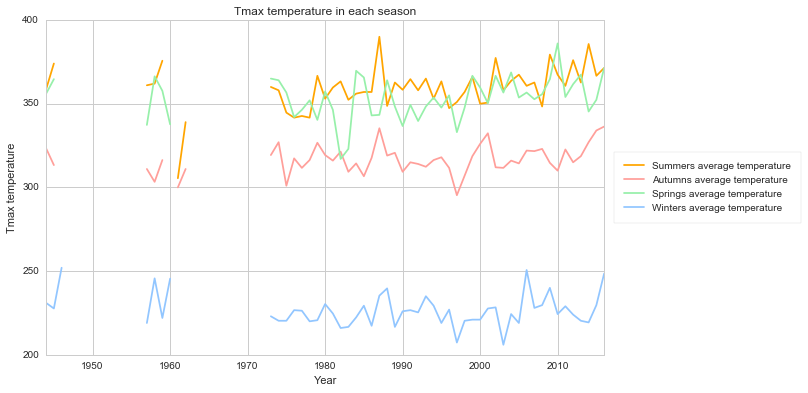

In [127]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, summer_temps, label='Summers average temperature', color='orange')
plt.plot(years, autumn_temps, label='Autumns average temperature', color='r')
plt.plot(years, spring_temps, label='Springs average temperature', color='g')
plt.plot(years, winter_temps, label='Winters average temperature', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Tmax temperature')
ax.set_xlabel('Year')
ax.set_title('Tmax temperature in each season')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

*May 26, 1998 recorded maximum temperature 48.5 

In [163]:
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white", color_codes=True)

from scipy import stats
global_t= global_temp.groupby(global_temp['Year'])
avg_by_year = global_t.mean()['Tmax']

In [164]:
yearly_temp=pd.groupby(global_temp,global_temp['Year'])

In [167]:
global_temp=global_temp.set_index(global_temp.Year)
global_temp.index=global_temp.index.to_datetime()

In [168]:
yearly_temp=pd.groupby(global_temp,global_temp.index.year)


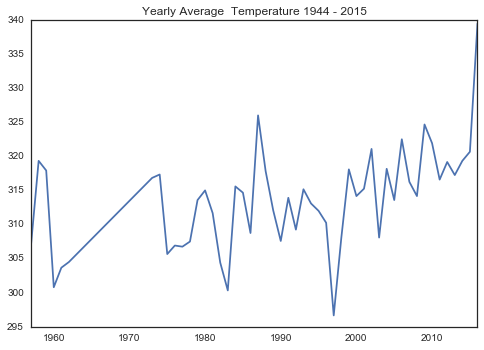

In [175]:
yearly_temp.Tmax.mean().loc[1950:].plot(title="Yearly Average  Temperature 1944 - 2015")

In [196]:
year_wise  = yearly_temp.Tmax.mean()

In [197]:
y = pd.Series.to_frame(year_wise)


In [199]:
y = pd.DataFrame.to_csv(y)

In [200]:
y

',Tmax\n1944,317.25\n1945,319.916666667\n1946,252.0\n1957,307.083333333\n1958,319.333333333\n1959,317.916666667\n1960,300.8\n1961,303.666666667\n1962,304.5\n1973,316.833333333\n1974,317.333333333\n1975,305.666666667\n1976,306.916666667\n1977,306.75\n1978,307.5\n1979,313.583333333\n1980,315.0\n1981,311.666666667\n1982,304.416666667\n1983,300.333333333\n1984,315.583333333\n1985,314.666666667\n1986,308.75\n1987,326.0\n1988,317.833333333\n1989,312.083333333\n1990,307.583333333\n1991,313.916666667\n1992,309.25\n1993,315.166666667\n1994,313.083333333\n1995,312.0\n1996,310.25\n1997,296.666666667\n1998,308.0\n1999,318.083333333\n2000,314.166666667\n2001,315.25\n2002,321.083333333\n2003,308.083333333\n2004,318.166666667\n2005,313.583333333\n2006,322.5\n2007,316.25\n2008,314.166666667\n2009,324.666666667\n2010,321.916666667\n2011,316.583333333\n2012,319.166666667\n2013,317.25\n2014,319.333333333\n2015,320.666666667\n2016,339.454545455\n'